In [ ]:
!uv pip install plotnine pyarrow

Using Python 3.11.9 environment at: /Users/matthiaskaeding/Projects/econ-rag/.venv
Audited 2 packages in 5ms


In [ ]:
import plotnine as pn
from pathlib import Path
import polars as pl
from plotnine import ggplot, aes, labs

pn.theme_set(pn.theme_matplotlib())

In [ ]:
proj_dir = Path().cwd().parents[0]
file = proj_dir / "data" / "abstracts_clean.parquet"
assert file.exists()
df = pl.read_parquet(file)
print(df.head())

shape: (5, 8)
┌─────────────┬──────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ title       ┆ year ┆ authors    ┆ abstract   ┆ journal    ┆ desired_jo ┆ abstract_o ┆ tokenized_ │
│ ---         ┆ ---  ┆ ---        ┆ ---        ┆ ---        ┆ urnal      ┆ riginal    ┆ abstract   │
│ str         ┆ i64  ┆ list[str]  ┆ str        ┆ str        ┆ ---        ┆ ---        ┆ ---        │
│             ┆      ┆            ┆            ┆            ┆ str        ┆ str        ┆ str        │
╞═════════════╪══════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ Motivated   ┆ 2024 ┆ ["Christin ┆ Myriad env ┆ American   ┆ American   ┆ <jats:p>   ┆ myriad env │
│ Errors      ┆      ┆ e L.       ┆ ironments  ┆ Economic   ┆ Economic   ┆ Myriad env ┆ ironments  │
│             ┆      ┆ Exley",    ┆ allow for  ┆ Review     ┆ Review     ┆ ironments  ┆ allow for  │
│             ┆      ┆ "Judd B…   ┆ …          ┆            ┆            ┆ a…

In [ ]:
df.group_by("desired_journal").len()

desired_journal,len
str,u32
"""Review of Economic Studies""",515
"""Quarterly Journal of Economics""",260
"""American Economic Review""",593
"""Econometrica""",405


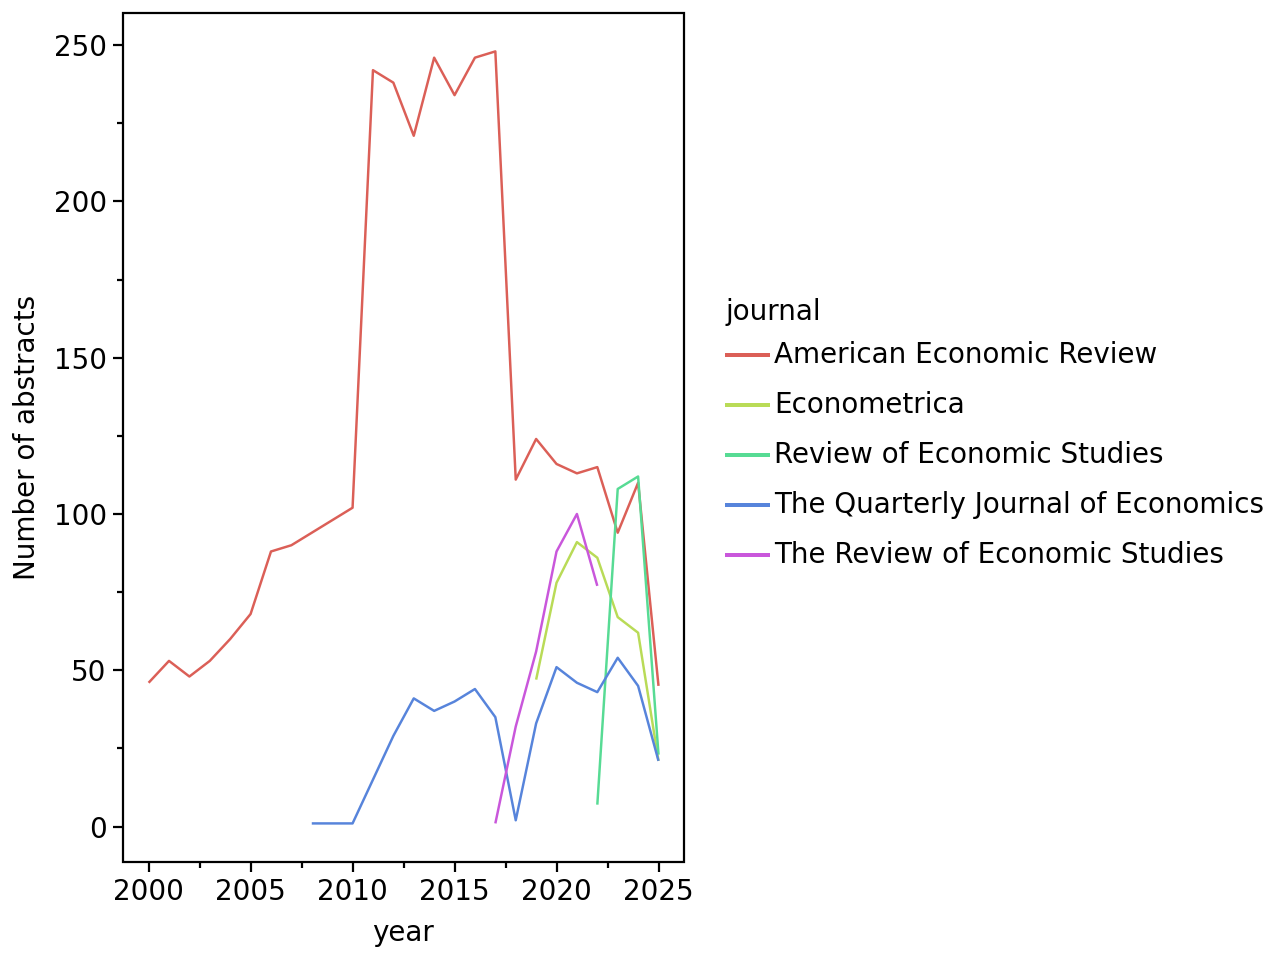

In [ ]:
counts = df.group_by("journal", "year").len()
(
    ggplot(counts)
    + aes("year", "len", color="journal")
    + pn.geom_line()
    + labs(y="Number of abstracts")
)

In [ ]:
from pprint import pprint
x = df.filter(pl.col("abstract").str.to_lowercase().str.contains("elasticity")).get_column("abstract").sample(1).item()
pprint(x)

('\n'
 '               Many households hold little wealth. In standard precautionary '
 'savings models, these households should not only display higher marginal '
 'propensities to consume (MPCs) but also higher future consumption growth. In '
 'contrast, we see from the Panel Study of Income Dynamics that such '
 '“hand-to-mouth” households do not display higher growth in spending. They '
 'also exhibit greater volatility of spending and adjust their spending to a '
 'greater extent through the number of categories consumed. Consistent with a '
 'role for preference heterogeneity, the panel data show that it is persistent '
 'differences across households, not current assets, that predict low '
 'consumption growth and other spending differences for the hand-to-mouth '
 'households. To identify the extent of preference heterogeneity, we consider '
 'the model of Kaplan and Violante with both liquid and illiquid assets, but '
 'allow heterogeneity in preferences. To match the data, ma